In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy 
import scipy.optimize

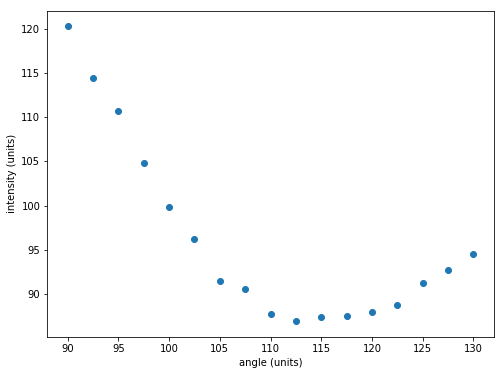

In [3]:
x_values = numpy.array([130
,127.5
,125
,122.5
,120
,117.5
,115
,112.5
,110
,107.5
,105
,102.5
,100
,97.5
,95
,92.5
,90])
y_values = numpy.array([94.50289352,92.67997685,91.27314815,88.81886574,88.015625,87.56828704,87.45081019
,86.92592593
,87.80613426
,90.59722222
,91.44560185
,96.25752315
,99.87673611
,104.8009259
,110.7280093
,114.4623843
,120.2980324])
y_errors = numpy.array([0.047835742,
0.062947366
,0.038075713
,0.075307835
,0.044623716
,0.05382822
,0.067388354
,0.067890515
,0.066328226
,0.070821895
,0.084988488
,0.074035374
,0.066342346
,0.081929953
,0.077277145
,0.073812962
,0.061985014])

assert len(y_values) == len(x_values)
assert len(y_errors) == len(y_values)


# def sin_model(x, param_vals):
#    return param_vals[0]+param_vals[1]*numpy.sin(param_vals[2]*x+param_vals[3])

def quadratic_model(x, param_vals):
    return param_vals[0] + param_vals[1]*x + param_vals[2]*x**2

params = [6,-4000,600000]

plt.figure(figsize=(8,6))
plt.errorbar(x_values, 
             y_values, 
             yerr=y_errors, # use y_errors array for y error bars
             marker='o', # circular markers at each datapoint
             linestyle='None') # no connecting lines

#plt.plot(x_values, quadratic_model(x_values, params))

plt.xlabel('angle (units)') # axis labels and units
plt.ylabel('intensity (units)')
plt.show() 

In [4]:
def linear_model(x, param_vals):
    return param_vals[0] + param_vals[1]*x

# def quadratic_model(x, param_vals):
#    return param_vals[0] + param_vals[1]*x**2

def chi_squared(model_params, model, x_data, y_data, y_error):
    return numpy.sum(((y_data - model(x_data, model_params))/y_error)**2)

In [5]:
model_function = quadratic_model 

initial_values = numpy.array([6,-4000,600000])


deg_freedom = x_values.size - initial_values.size # Make sure you understand why!
print('DoF = {}'.format(deg_freedom))


fit_linear = scipy.optimize.minimize(chi_squared, initial_values, args=(model_function, x_values, y_values, y_errors))

print(fit_linear.success) # Did the minimisation complete successfully?
print(fit_linear.message)

DoF = 14
False
Desired error not necessarily achieved due to precision loss.


In [6]:
a_solution = fit_linear.x[0]
b_solution = fit_linear.x[1]
c_solution = fit_linear.x[2]

print('best linear fit a = {} a_units?'.format(a_solution))
print('best linear fit b = {} b_units?'.format(b_solution))
print('best linear fit b = {} b_units?'.format(c_solution))

# minimized value for chisq function is fit_linear.fun
print('minimised chi-squared = {}'.format(fit_linear.fun))

best linear fit a = 732.8943115973375 a_units?
best linear fit b = -11.085098741999522 b_units?
best linear fit b = 0.04756276151825226 b_units?
minimised chi-squared = 2821.100176100077


In [7]:
chisq_min = chi_squared([a_solution, b_solution, c_solution], model_function, x_values, y_values, y_errors)
print('chi^2_min = {}'.format(chisq_min))

chisq_reduced = chisq_min/deg_freedom
print('reduced chi^2 = {}'.format(chisq_reduced))

chi^2_min = 2821.100176100077
reduced chi^2 = 201.5071554357198


In [8]:
import scipy.stats

P_value = scipy.stats.chi2.sf(chisq_min, deg_freedom)
print('P(chi^2_min, DoF) = {}'.format(P_value))

P(chi^2_min, DoF) = 0.0


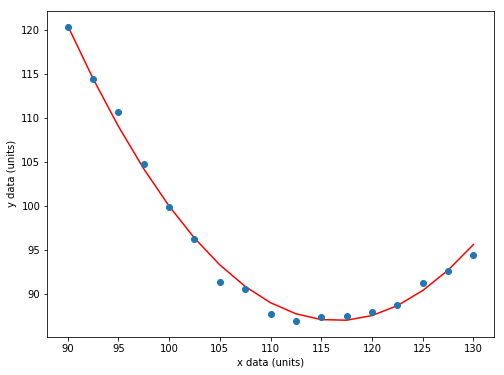

In [9]:
plt.figure(figsize=(8,6))
plt.errorbar(x_values, 
             y_values, 
             yerr=y_errors, 
             marker='o', 
             linestyle='None')

plt.xlabel('x data (units)') # Axis labels
plt.ylabel('y data (units)')

# Generate best fit line using model function and best fit parameters, and add to plot
fit_line = model_function(x_values, [a_solution, b_solution, c_solution])
plt.plot(x_values, fit_line, 'r')
plt.show()

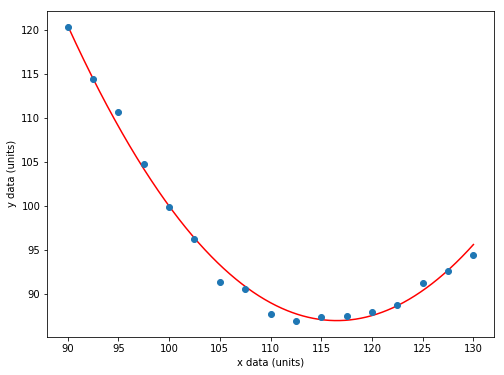

In [10]:
smooth_xvals = numpy.linspace(min(x_values), max(x_values), 1000)   
# make a smoother line - use 1000 equally spaced points over the range of the measured points.

plt.figure(figsize=(8,6))
plt.errorbar(x_values, 
             y_values, 
             yerr=y_errors, 
             marker='o', 
             linestyle='None')

plt.xlabel('x data (units)')
plt.ylabel('y data (units)')

simulated_line = model_function(smooth_xvals, [a_solution, b_solution, c_solution]) 
plt.plot(smooth_xvals, simulated_line, 'r')
plt.show()

In [11]:
a_range = 1
b_range = 0.05

n_points = 100          

# Generate grid and data
a_axis = numpy.linspace(a_solution-a_range, a_solution+a_range, num=n_points)
b_axis = numpy.linspace(b_solution-b_range, b_solution+b_range, num=n_points)
plot_data = numpy.zeros((n_points, n_points))

for i, b_val in enumerate(b_axis): # Nested loops to demonstrate what is happening...
    for j, a_val in enumerate(a_axis): # (numpy can actually do this far more efficiently as a vectorised calculation)
        plot_data[i][j] = chi_squared([a_val, b_val], model_function, x_values, y_values, y_errors)

IndexError: list index out of range

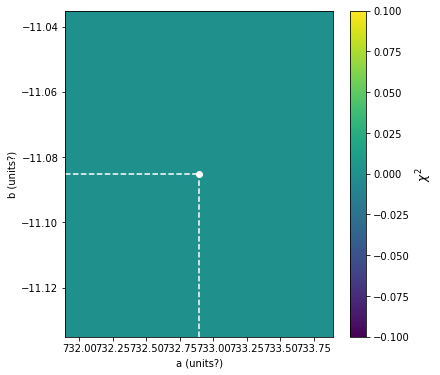

In [12]:
plt.figure(figsize=(6,6))
im = plt.imshow(plot_data, extent=(a_solution-a_range, a_solution+a_range, b_solution-b_range, b_solution+b_range), 
                origin='lower', aspect='auto')

plt.xlim(a_solution-a_range, a_solution+a_range) # axis ranges
plt.ylim(b_solution-b_range, b_solution+b_range)

plt.ylabel('b (units?)') # Axis labels
plt.xlabel('a (units?)')

cbar=plt.colorbar(im, orientation='vertical') # # Colorbar and label
cbar.set_label('$\chi^2$', fontsize=12)

plt.plot(a_solution, b_solution, 'wo') # Add in best fit point and dashed lines
plt.plot((a_solution, a_solution), (b_solution-b_range, b_solution), linestyle='--', color='w')
plt.plot((a_solution-a_range, a_solution), (b_solution, b_solution), linestyle='--', color='w')
plt.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


ValueError: Specified levels [1, 4, 9] don't match available levels [-2821.100176100077]

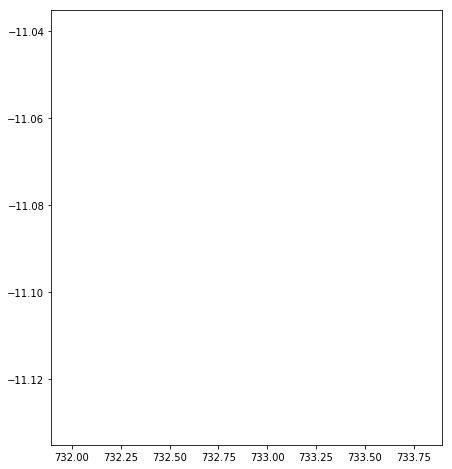

In [13]:
X, Y = numpy.meshgrid(a_axis, b_axis, indexing='xy')
contour_data = plot_data - chisq_min

levels = [1, 4, 9] # Contour levels to plot - delta chi-squared of 1, 4 & 9 correspond to 1, 2 & 3 standard deviations
plt.figure(figsize=(7,8))
contour_plot = plt.contour(X, Y, contour_data, levels=levels, colors='b', origin = 'lower')
plt.clabel(contour_plot, levels, fontsize=12, inline=1, fmt=r'$\chi^2 = \chi^2_{min}+%1.0f$') 

plt.xlabel('a (units?)') # Axis labels
plt.ylabel('b (units?)')

import matplotlib.ticker as ticker # This allows you to modify the tick markers to assess the errors from the chi-squared contour plots.

xtick_spacing = 0.25 
ytick_spacing = 0.02

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(xtick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(ytick_spacing))


plt.plot(a_solution, b_solution, 'ro') # Add in best fit point and dashed lines to axes
plt.plot((a_solution, a_solution), (b_solution-b_range, b_solution), linestyle='--', color='r')
plt.plot((a_solution-a_range, a_solution), (b_solution, b_solution), linestyle='--', color='r')
plt.show()

In [15]:
contours = contour_plot.collections[0].get_paths()    # Get hold of the contours from the plot
onesigma_contour = contours[0].vertices       # Grab the set of points constituting the one confidence interval contour
                                              
maxs = numpy.amax(onesigma_contour, axis=0)   # Get the extrema along the two axes - max and min values
mins = numpy.amin(onesigma_contour, axis=0)   # These should be symmetric about the solution...
errs_graphical = (maxs-mins)/2                          # Calculate one standard error in the parameters

a_error = errs_graphical[0]
b_error = errs_graphical[1]

print('Parameter a = {} +/- {}'.format(a_solution, a_error))           
print('Parameter b = {} +/- {}'.format(b_solution, b_error)) 

IndexError: list index out of range

In [14]:
errs_Hessian = numpy.sqrt(numpy.diag(2*fit_linear.hess_inv))

a_err = errs_Hessian[0]
b_err = errs_Hessian[1]

print('Parameter a = {} +/- {}'.format(a_solution, a_err))           
print('Parameter b = {} +/- {}'.format(b_solution, b_err)) 

Parameter a = 732.8943115973375 +/- 1.342234956210549
Parameter b = -11.085098741999522 +/- 0.024475376463468732
